<a href="https://colab.research.google.com/github/Eye-Am-Him/Analysing-Genre-Trends/blob/main/Hip_Hop_Popularity_In_Recent_Years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Has the percentage of hip-hop songs in the top charts changed over the decades?

Investigate the proportion of hip-hop songs in each decade (e.g., 1980s, 1990s, 2000s) to understand its popularity trajectory.

In [5]:
# Spotify Top 10,000 Songs EDA on the Rise and Fall of Hip-Hop

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the dataset
df = pd.read_csv("/content/top_10000_1960-now.csv")

In [9]:
# Ensure the 'Album Release Date' column is in datetime format
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')

# Extract the year from the 'Album Release Date' column
df['year'] = df['Album Release Date'].dt.year

# Drop any rows where 'year' is NaN (if some rows had invalid or missing dates)
df = df.dropna(subset=['year'])

In [11]:
# 1. Filter the dataset for hip-hop songs
# Example: Using 'genre' column if available, or 'artist' or 'title' keyword matching
hip_hop_df = df[df['Artist Genres'].str.contains("hip-hop|rap", case=False, na=False)]

# Make sure the 'hip_hop_df' is a copy to avoid SettingWithCopyWarning
hip_hop_df = hip_hop_df.copy()

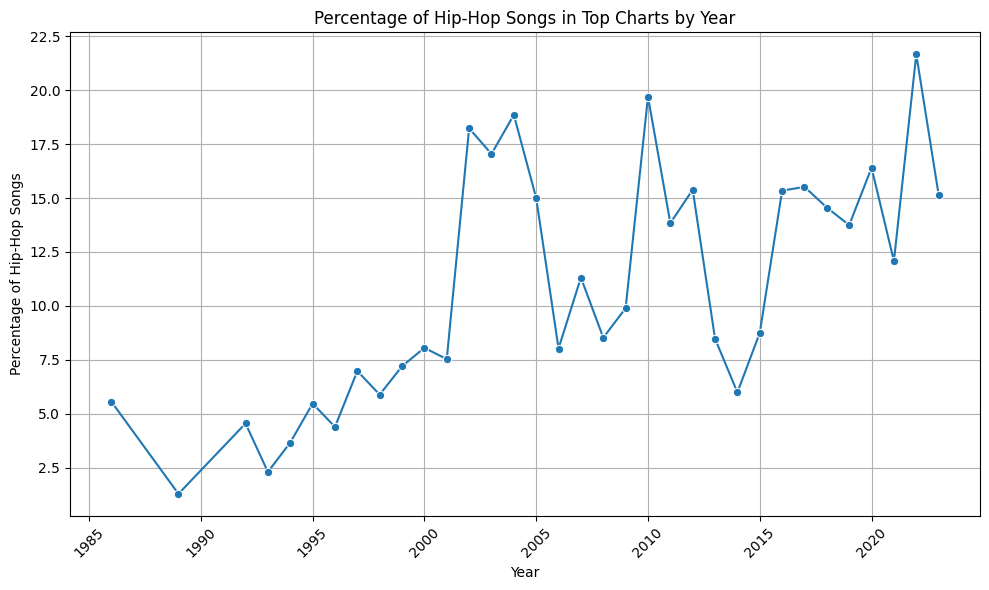

In [12]:
# 2. Analyze the percentage of hip-hop songs by year
hip_hop_by_year = hip_hop_df.groupby('year').size() / df.groupby('year').size() * 100

# Plot the rise and fall of hip-hop over time
plt.figure(figsize=(10,6))
sns.lineplot(x=hip_hop_by_year.index, y=hip_hop_by_year.values, marker='o')
plt.title('Percentage of Hip-Hop Songs in Top Charts by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Hip-Hop Songs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Ensure layout is adjusted properly
plt.show()

# Conclusion:
# This plot shows the year-to-year percentage of hip-hop songs in the top charts.
# You can observe how hip-hop's popularity has fluctuated and evolved over the years.